In [1]:
import numpy as np 
import nibabel as nib 
import matplotlib.pyplot as plt 
import nilearn.plotting as niplt
%matplotlib inline
import os

In [2]:
d="/jukebox/griffiths/bert-brains/"
#mask=nib.load(d+"21styear_data/whole_brain_mask.nii.gz").get_fdata().astype('bool')
def get_result_combined(result_dir,threshold=0.95):
    nii=nib.load(result_dir+"two_story_combined_mean.nii.gz")
    affine=nii.affine
    result_volume=nii.get_fdata()
    if threshold>0:
        p_value_nii=nib.load(result_dir+"combined_bootstrap_pvalue_parcellation.nii.gz")
        p_value_volume=p_value_nii.get_fdata()
        binary_volume=p_value_volume>=threshold
        result_volume=result_volume*binary_volume
    return nib.Nifti1Image(result_volume,affine)

black_subs=['sub-300', 'sub-304', 'sub-293', 'sub-273', 'sub-265', 'sub-307', 'sub-283', 'sub-275', 
'sub-291', 'sub-297', 'sub-303', 'sub-294', 'sub-286', 'sub-282', 'sub-310', 'sub-302', 'sub-312', 
'sub-301', 'sub-287', 'sub-298', 'sub-313', 'sub-285', 'sub-292', 'sub-311', 'sub-267', 'sub-295', 
'sub-305', 'sub-274', 'sub-290', 'sub-288', 'sub-281', 'sub-276', 'sub-277', 'sub-299', 'sub-308',
 'sub-272', 'sub-284', 'sub-289', 'sub-280', 'sub-309', 'sub-306', 'sub-296', 'sub-127', 'sub-279', 
 'sub-315', 'sub-314']
slumlordreach_subs=['sub-145', 'sub-143', 'sub-016', 'sub-142', 'sub-141', 'sub-133', 'sub-140', 'sub-136', 
'sub-084', 'sub-135', 'sub-137', 'sub-138', 'sub-111', 'sub-106', 'sub-134', 'sub-132', 'sub-144']

def get_result_dataset(result_dir,threshold=0.95):
    if 'slumlordreach' in result_dir:
        subs=slumlordreach_subs
    else:
        subs=black_subs
    
    result_volume=np.mean([nib.load(result_dir+sub+"_parcels_encoding.nii.gz").get_fdata() for sub in subs],axis=0)
    affine=nib.load(result_dir+subs[0]+"_parcels_encoding.nii.gz").affine 
    if threshold>0:
        p_value_nii=nib.load(result_dir+"individual_bootstrap_pvalue_parcellation.nii.gz")
        p_value_volume=p_value_nii.get_fdata()
        binary_volume=p_value_volume>=threshold
        result_volume=result_volume*binary_volume
    return nib.Nifti1Image(result_volume,affine)
    
    
    
    
    
    

In [3]:
reps_of_interest=['bert-base-uncased_syntactic_complexity_L-inf_T-128_D-concat.npy','bert-base-uncased_syntactic_complexity_L-1_T-128_D-concat.npy','bert-base-uncased_syntactic_complexity_L-inf_T-10_D-concat.npy','bert-base-uncased_syntactic_complexity_L-inf_T-128_D-fwd.npy','bert-base-uncased_syntactic_complexity_L-inf_T-128_D-bck.npy','bert-base-uncased_syntactic_complexity_L-inf_T-128_D-concat.npy',
'bert-base-uncased_syntactic_distance_T-128_D-concat.npy']
#os.listdir(layer_prefix)

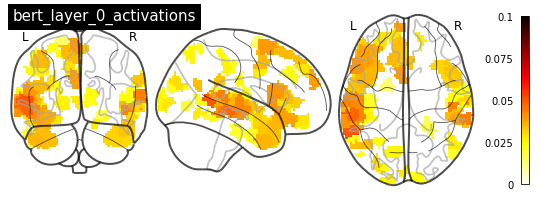

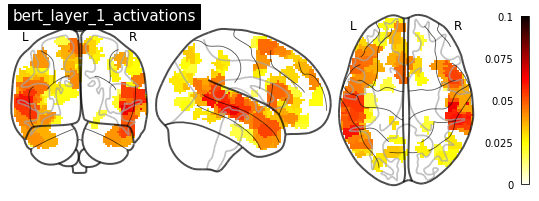

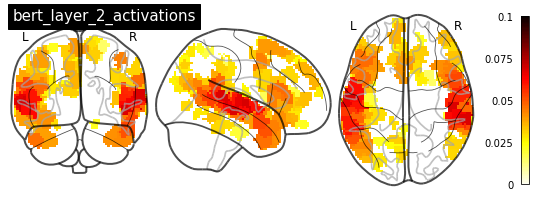

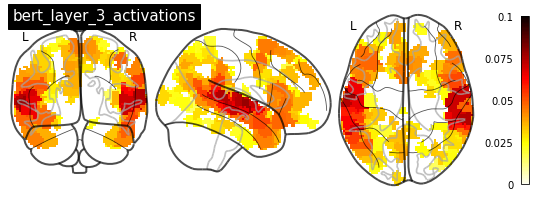

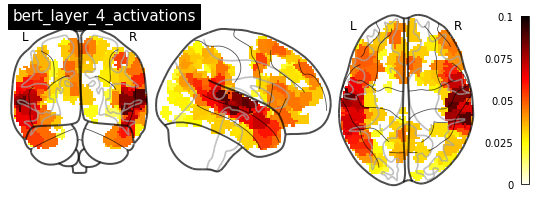

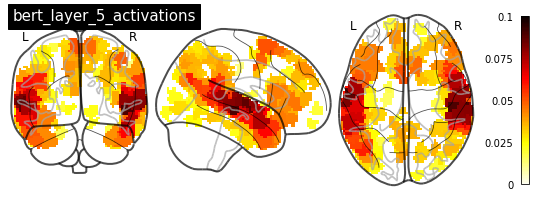

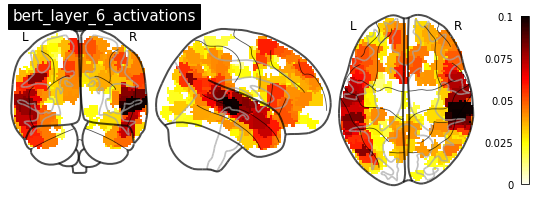

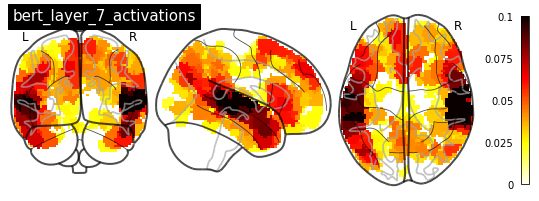

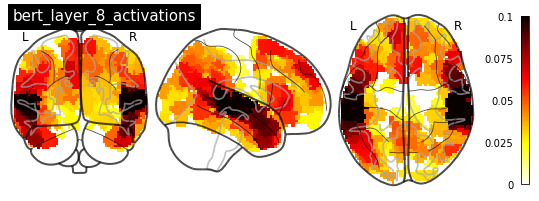

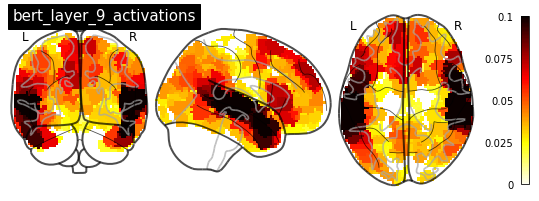

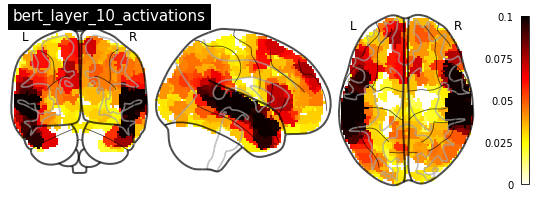

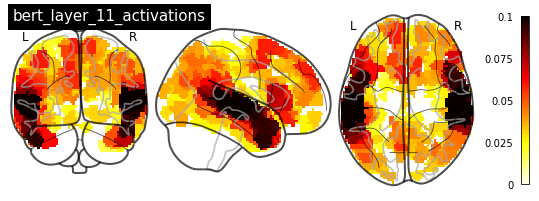

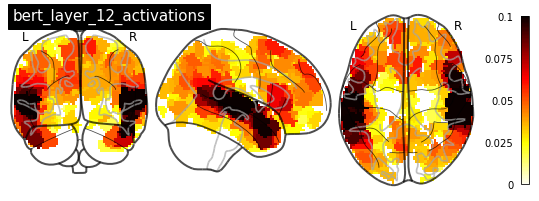

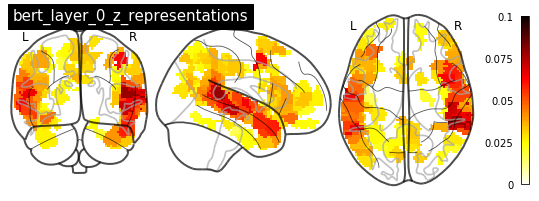

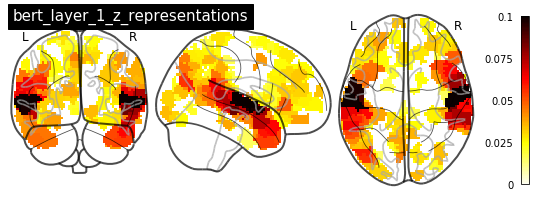

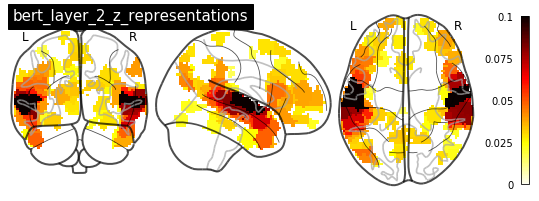

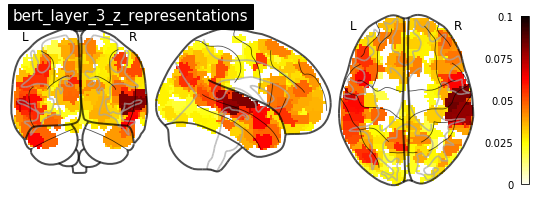

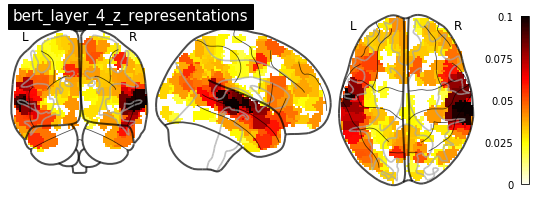

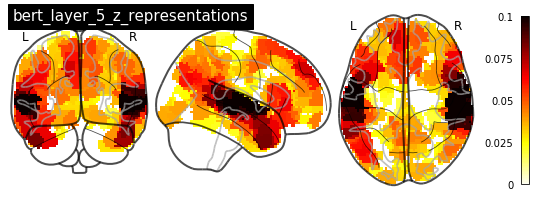

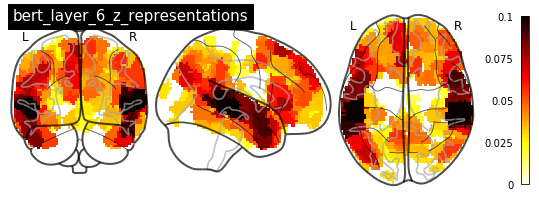

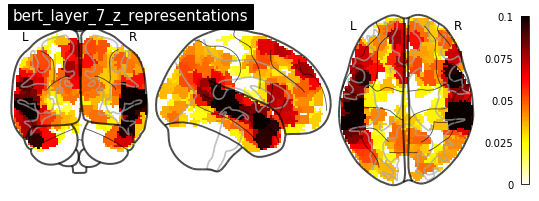

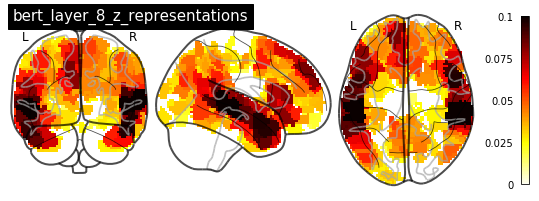

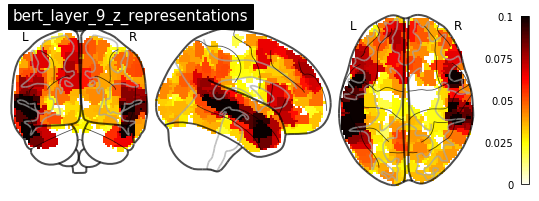

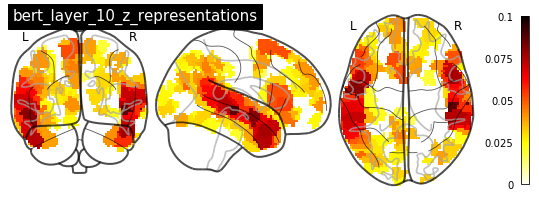

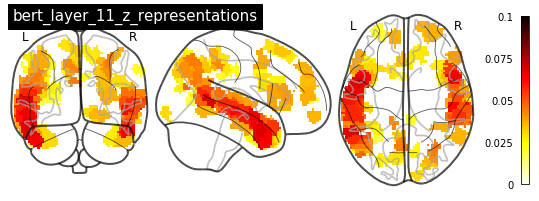

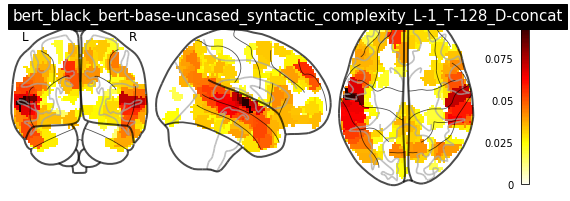

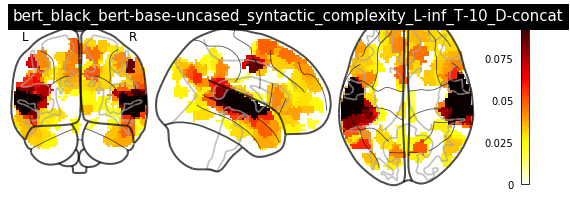

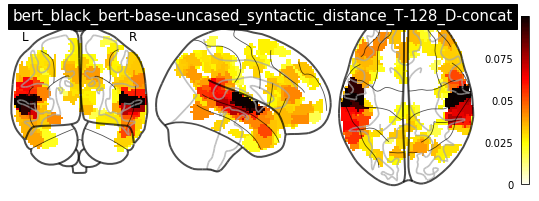

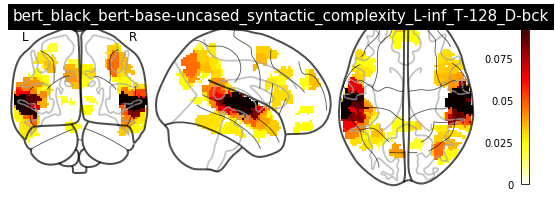

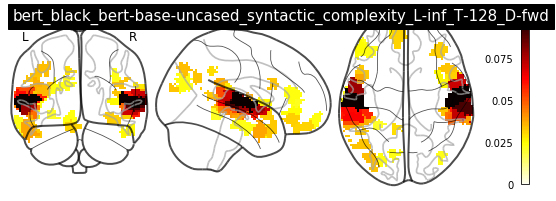

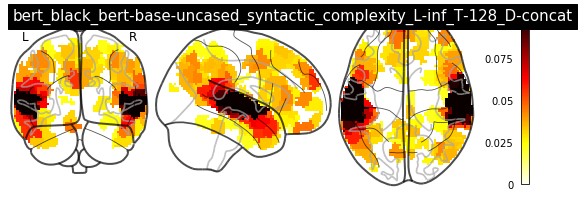

In [7]:
#Only Black
layer_names=['layer_'+str(i)+"_activations" for i in range(0,13)] 
save_prefix=d+"results/black/"
save_dirs=[save_prefix+"encoding-"+layer+"/" for layer in layer_names]

for i in range(12):
    layer='layer_'+str(i)+"_z_representations"
    layer_names.append(layer) 
    save_dirs.append(save_prefix+"encoding-"+layer+"/")

layer_prefix=d+'code/bert-brains/data/black/bert-base-uncased/syntactic_analyses/'
for fname in os.listdir(layer_prefix):
    of_interest=False
    for rep in reps_of_interest:
        if rep in fname:
            of_interest=True 

    if of_interest:
        layer_names.append(fname[:-4])
        save_dirs.append(save_prefix+'encoding-'+fname[:-4]+"/")
result_dirs=save_dirs

for i,result_dir in enumerate(result_dirs):
    if 'slumlordreach' in layer_names[i]:
        title=layer_names[i][14:]
    else:
        title='bert_'+layer_names[i]
    niplt.plot_glass_brain(get_result_dataset(result_dir,threshold=0.95),colorbar=True,title=title,vmax=0.1)




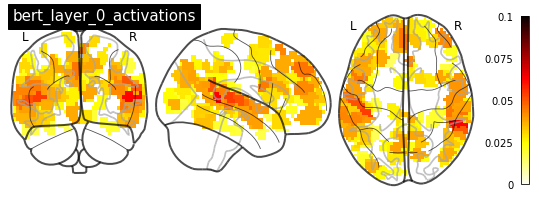

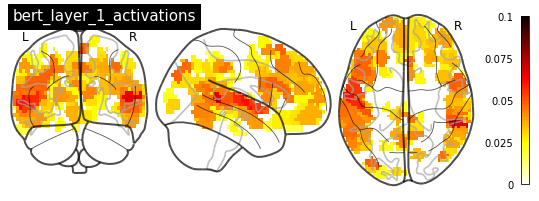

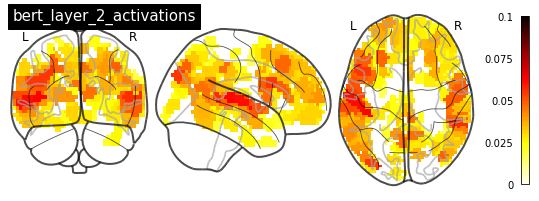

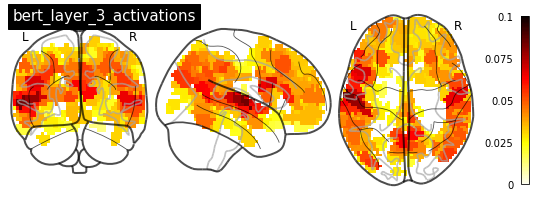

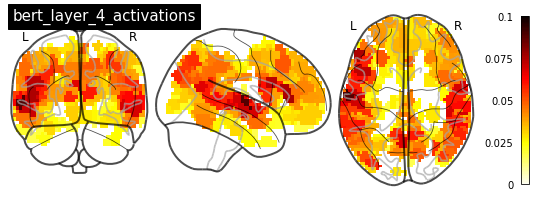

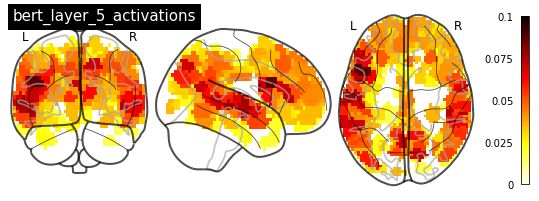

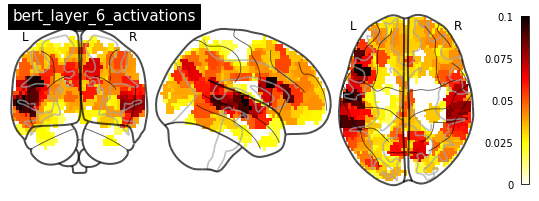

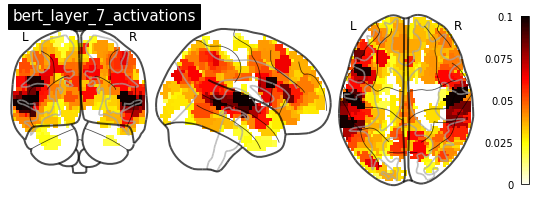

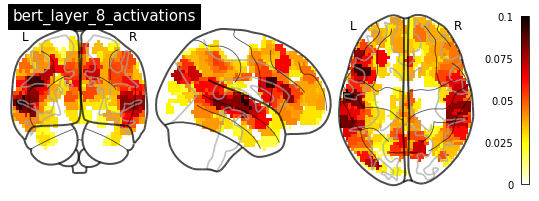

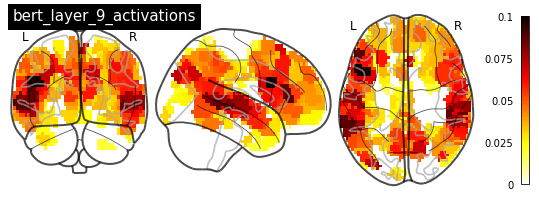

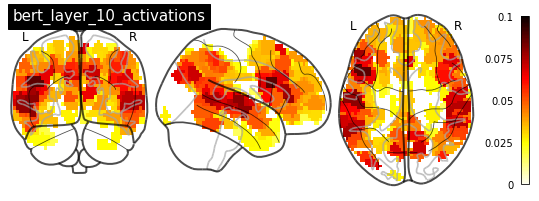

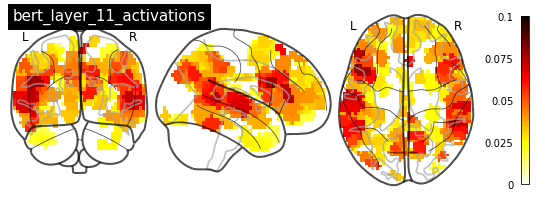

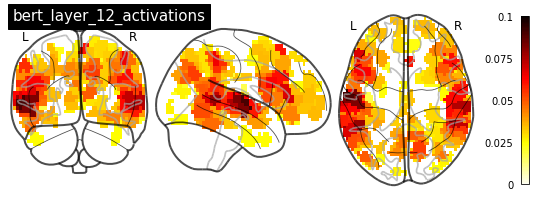

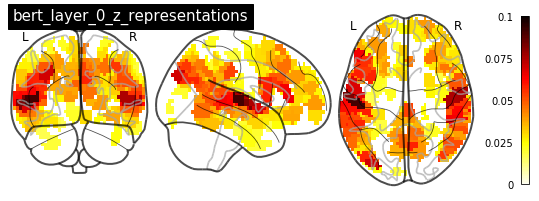

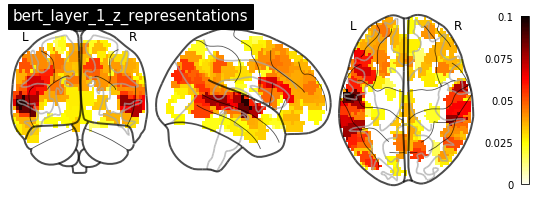

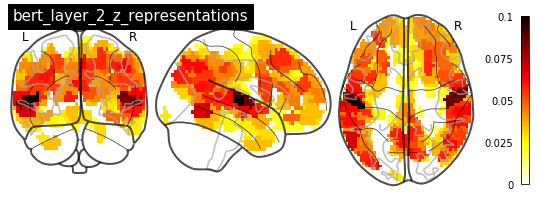

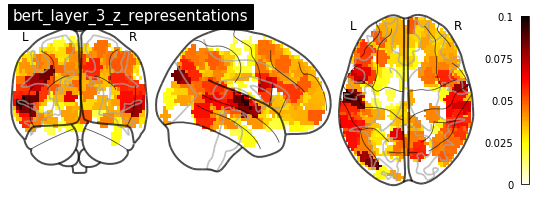

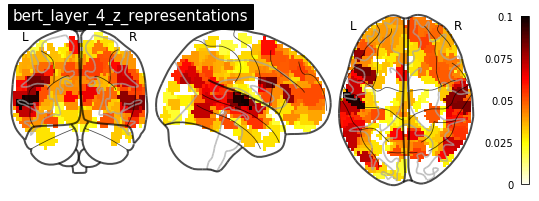

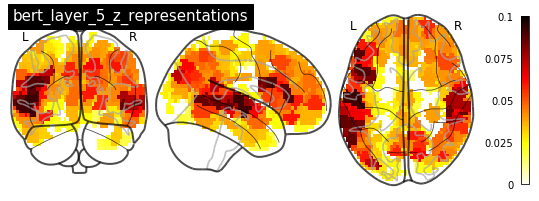

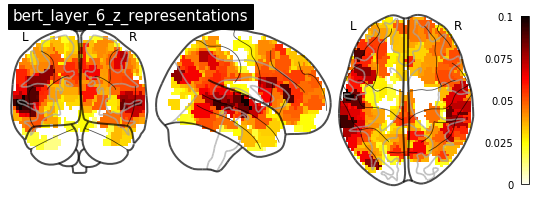

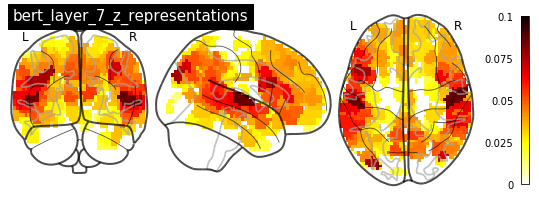

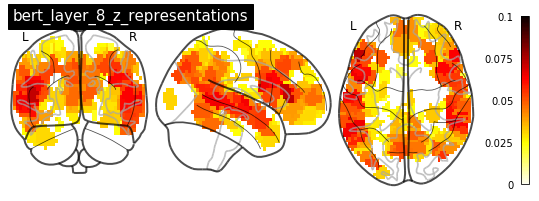

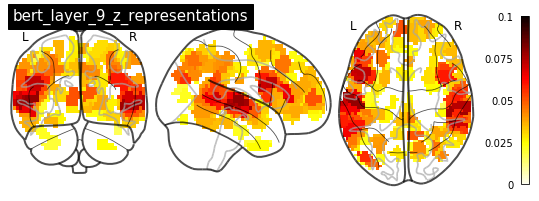

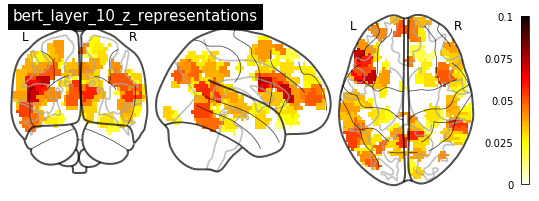

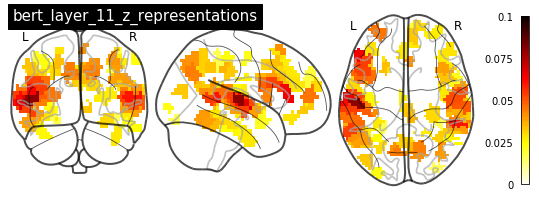

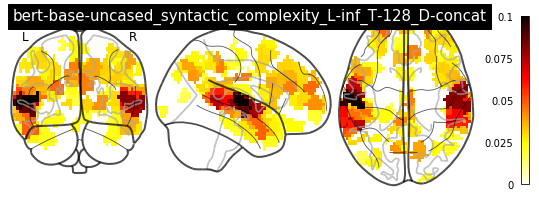

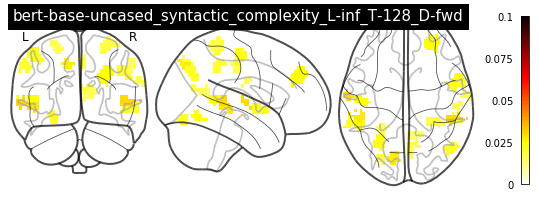

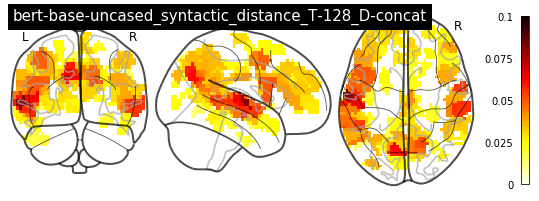

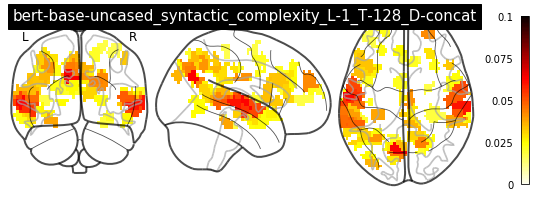

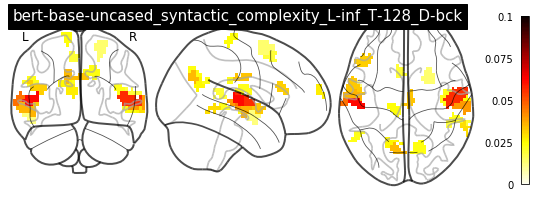

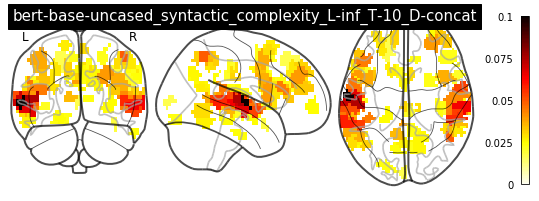

In [8]:
#Only Slumlordreach
layer_names=['layer_'+str(i)+"_activations" for i in range(0,13)] 
save_prefix=d+"results/slumlordreach/"
save_dirs=[save_prefix+"encoding-"+layer+"/" for layer in layer_names]

for i in range(12):
    layer='layer_'+str(i)+"_z_representations"
    layer_names.append(layer) 
    save_dirs.append(save_prefix+"encoding-"+layer+"/")

layer_prefix=d+'code/bert-brains/data/slumlordreach/bert-base-uncased/syntactic_analyses/'
for fname in os.listdir(layer_prefix):
    of_interest=False
    for rep in reps_of_interest:
        if rep in fname:
            of_interest=True 

    if of_interest:
        layer_names.append(fname[:-4])
        save_dirs.append(save_prefix+'encoding-'+fname[:-4]+"/")
result_dirs=save_dirs

for i,result_dir in enumerate(result_dirs):
    if 'slumlordreach' in layer_names[i]:
        title=layer_names[i][14:]
    else:
        title='bert_'+layer_names[i]
    niplt.plot_glass_brain(get_result_dataset(result_dir,threshold=0.95),colorbar=True,title=title,vmax=0.1)




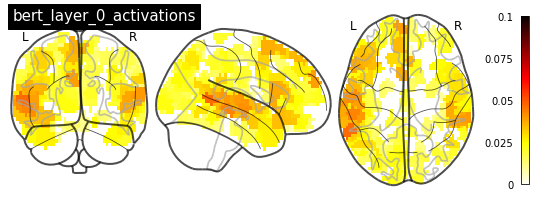

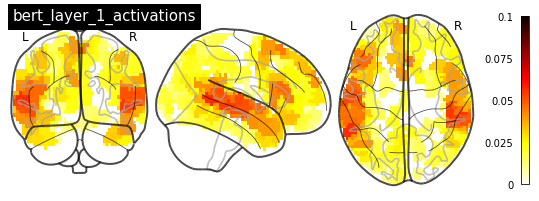

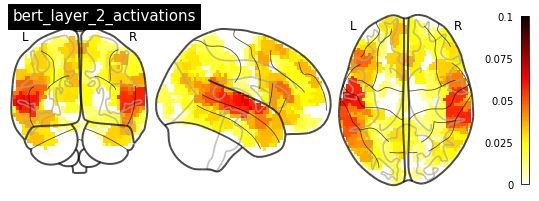

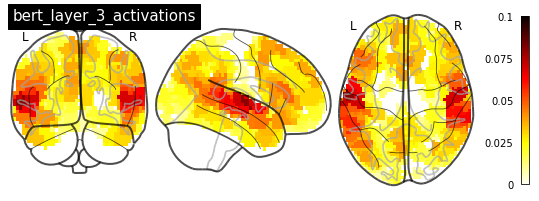

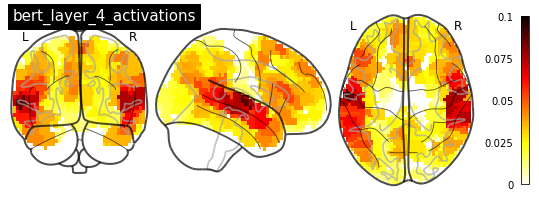

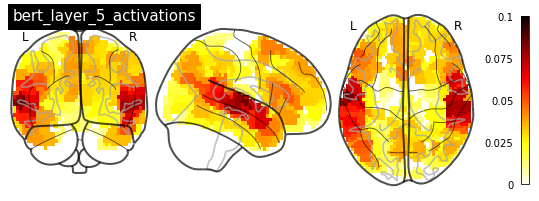

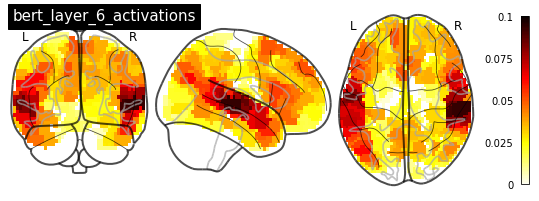

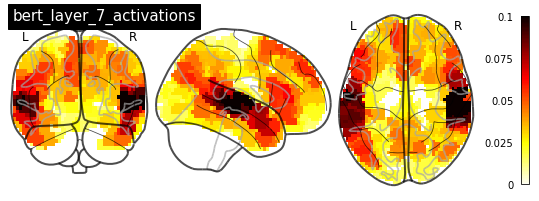

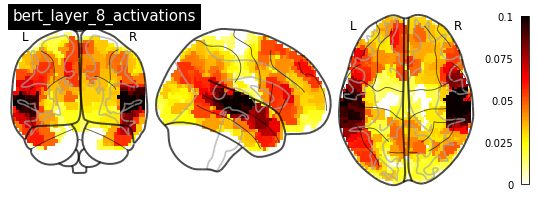

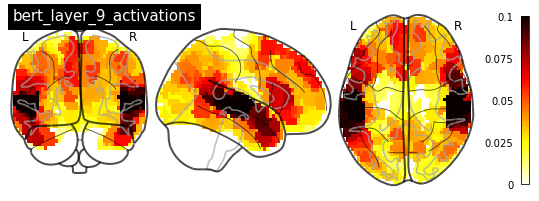

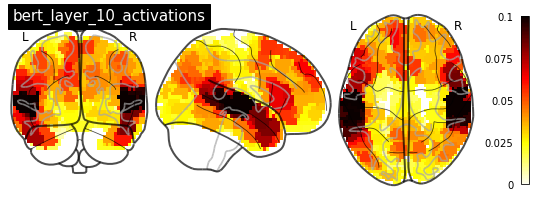

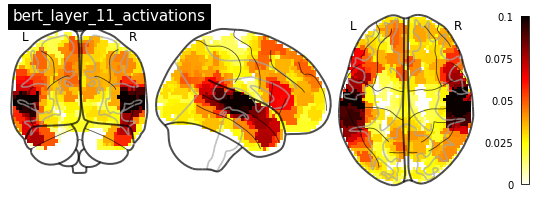

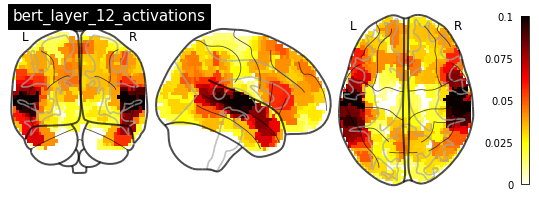

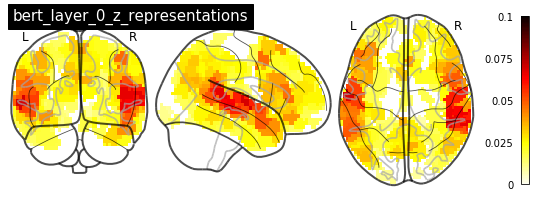

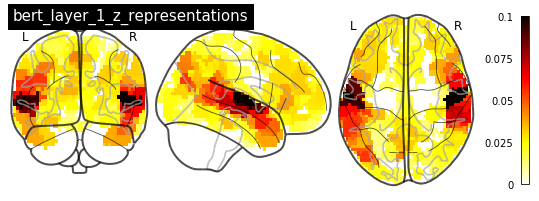

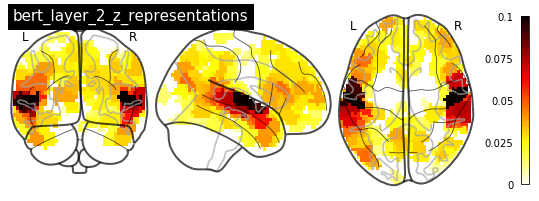

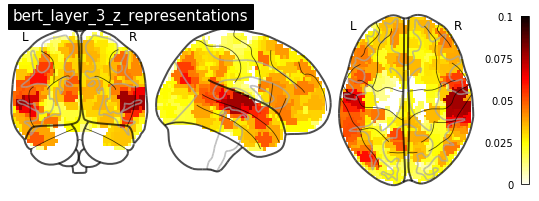

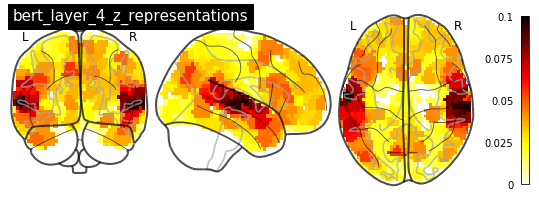

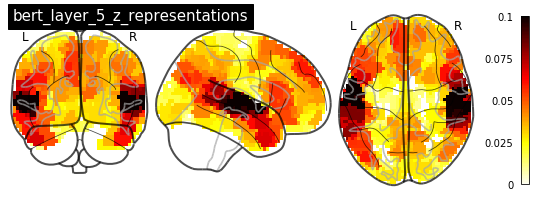

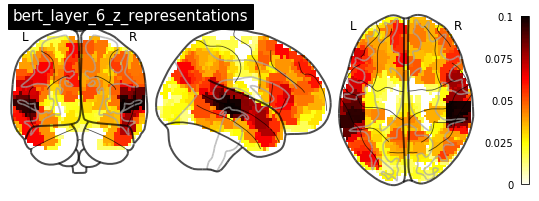

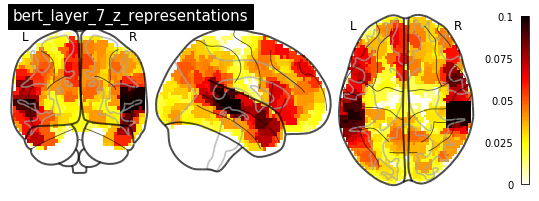

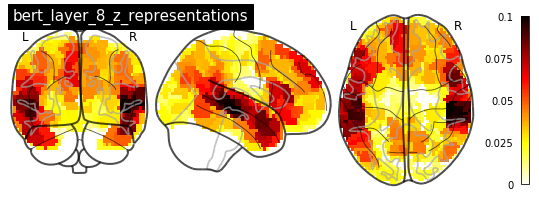

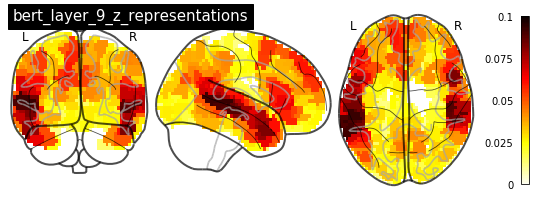

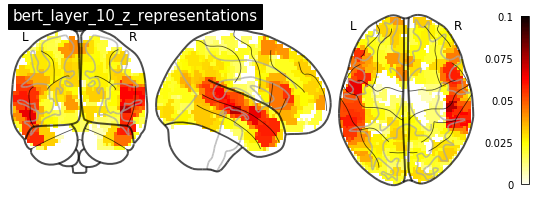

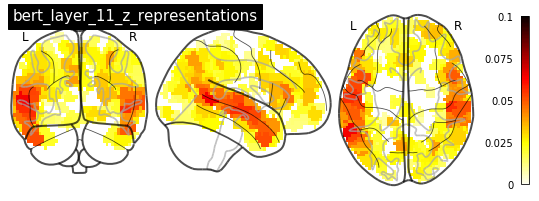

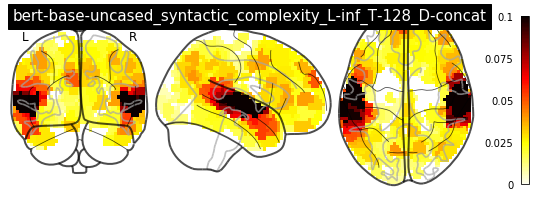

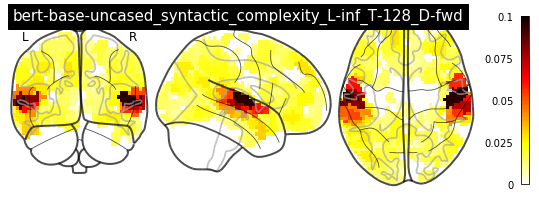

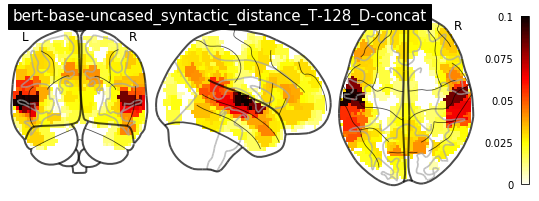

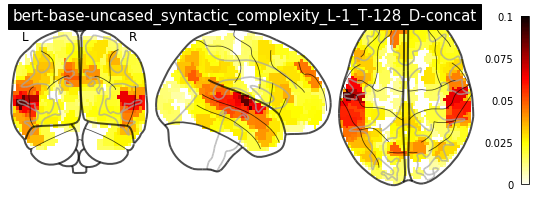

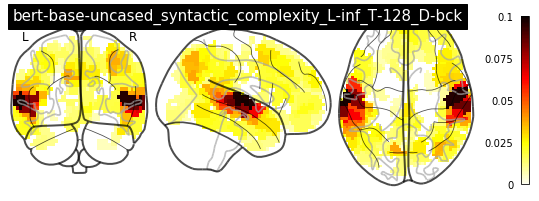

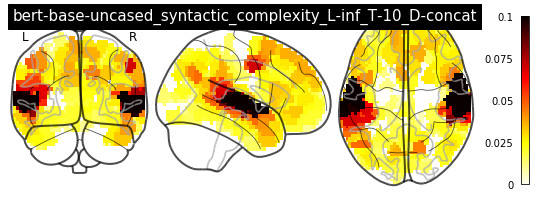

In [9]:
#Combined 
layer_names=['layer_'+str(i)+"_activations" for i in range(0,13)] 
save_prefix=d+"results/slumlordreach/"
save_dirs=[save_prefix+"encoding-"+layer+"/" for layer in layer_names]

for i in range(12):
    layer='layer_'+str(i)+"_z_representations"
    layer_names.append(layer) 
    save_dirs.append(save_prefix+"encoding-"+layer+"/")
    
layer_prefix=d+'code/bert-brains/data/slumlordreach/bert-base-uncased/syntactic_analyses/'
for fname in os.listdir(layer_prefix):
    of_interest=False
    for rep in reps_of_interest:
        if rep in fname:
            of_interest=True 

    if of_interest:
        layer_names.append(fname[:-4])
        save_dirs.append(save_prefix+'encoding-'+fname[:-4]+"/")
result_dirs=save_dirs

for i,result_dir in enumerate(result_dirs):
    if 'slumlordreach' in layer_names[i]:
        title=layer_names[i][14:]
    else:
        title='bert_'+layer_names[i]
    niplt.plot_glass_brain(get_result_combined(result_dir,threshold=0.95),colorbar=True,title=title,vmax=0.1)


